In [48]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('Churn_Modelling.csv')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [51]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [52]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [53]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [54]:
data.shape

(10000, 14)

In [55]:
data.columns = data.columns.str.strip()

In [56]:
X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
Y = data['Exited']

In [57]:
Y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [59]:
X_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25)

In [61]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(80,80,80), random_state=0, max_iter=100, activation='relu')

In [62]:
nn_model.fit(X_train, Y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(80, 80, 80), max_iter=100, random_state=0)

In [63]:
y_pred = nn_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
Y_test.count()

2500

In [65]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [66]:
nn_accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy : ", nn_accuracy)

nn_report = classification_report(Y_test, y_pred)
print("Report : ", nn_report)

Accuracy :  0.8312
Report :                precision    recall  f1-score   support

           0       0.87      0.93      0.90      1995
           1       0.61      0.45      0.52       505

    accuracy                           0.83      2500
   macro avg       0.74      0.69      0.71      2500
weighted avg       0.82      0.83      0.82      2500



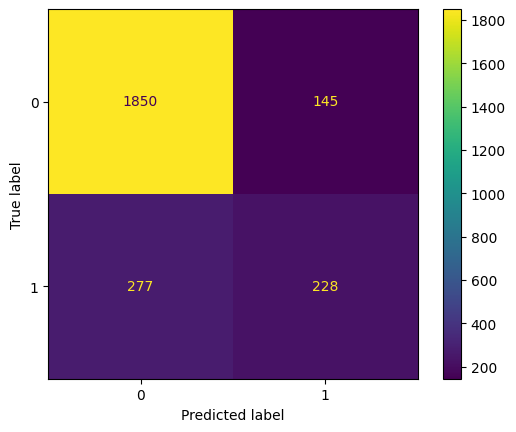

In [67]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)

In [68]:
Y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [69]:
pip install imbalanced-learn


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_new, Y_new = ros.fit_resample(X, Y)

In [71]:
Y_new.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

In [73]:
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(X_scaled, Y_new, test_size=0.25)

In [74]:
from sklearn.neural_network import MLPClassifier 
nn_model = MLPClassifier(hidden_layer_sizes=(80,80,80), random_state=0, max_iter=100, activation='relu')
nn_model.fit(Xn_train, Yn_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(80, 80, 80), max_iter=100, random_state=0)

In [75]:
yn_predict = nn_model.predict(Xn_test)
yn_predict

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [76]:
Yn_test.value_counts()

Exited
0    2036
1    1946
Name: count, dtype: int64

In [77]:
yn_accuracy = accuracy_score(Yn_test, yn_predict)
print(yn_predict)

yn_report = classification_report(Yn_test, yn_predict)
print(yn_report)

[1 0 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      2036
           1       0.78      0.94      0.85      1946

    accuracy                           0.84      3982
   macro avg       0.86      0.85      0.84      3982
weighted avg       0.86      0.84      0.84      3982



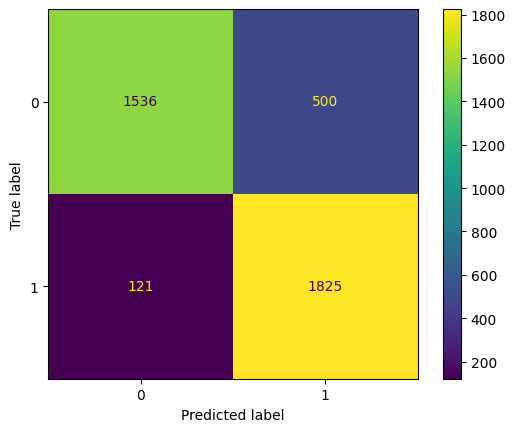

In [78]:
ConfusionMatrixDisplay.from_predictions(Yn_test, yn_predict)